# **Import Libraries and modules**

In [1]:
!nvidia-smi

Wed Nov 13 16:30:21 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.50       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [3]:
!python -V

Python 3.6.8


In [4]:
# https://keras.io/
#!pip install -q keras
#import keras

!pip install tensorflow-gpu

     |████████████████████████████████| 380.8MB 42kB/s 
     |████████████████████████████████| 450kB 33.5MB/s 
     |████████████████████████████████| 3.8MB 37.9MB/s 
     |████████████████████████████████| 81kB 11.3MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled goog

In [5]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Add
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras import utils

from tensorflow.keras.datasets import mnist

print(tf.version.VERSION)
print(tf.keras.__version__)

2.0.0
2.2.4-tf


In [0]:
tf.compat.v1.disable_eager_execution() ## https://github.com/tensorflow/tensorflow/issues/34235
#tf.compat.v1.enable_eager_execution()

### Load pre-shuffled MNIST data into train and test sets

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


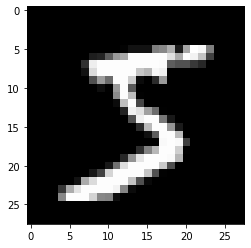

In [8]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap= 'gray')

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = utils.to_categorical(y_train, 10)
Y_test = utils.to_categorical(y_test, 10)

In [13]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
from tensorflow.keras.layers import Activation
model = Sequential()

 
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=(28,28,1), use_bias = False))
model.add(Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu', use_bias = False))
model.add(Conv2D(filters = 128, kernel_size=(3,3), activation = 'relu', use_bias = False))
model.add(MaxPool2D())
model.add(Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu', use_bias = False))
model.add(Conv2D(filters = 128, kernel_size=(3,3), activation = 'relu', use_bias = False))
model.add(Conv2D(filters = 10, kernel_size = (1, 1) , activation='relu', use_bias = False))
model.add(Conv2D(filters = 10, kernel_size = (7, 7), use_bias = False))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        288       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18432     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       73728     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          73728     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         73728     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 10)          1

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [17]:
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data = (X_test, Y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 298us/sample - loss: 0.2290 - accuracy: 0.9274 - val_loss: 0.0480 - val_accuracy: 0.9839
Epoch 2/10
60000/60000 [==============================] - 15s 248us/sample - loss: 0.0525 - accuracy: 0.9836 - val_loss: 0.0361 - val_accuracy: 0.9876
Epoch 3/10
60000/60000 [==============================] - 15s 248us/sample - loss: 0.0382 - accuracy: 0.9880 - val_loss: 0.0317 - val_accuracy: 0.9896
Epoch 4/10
60000/60000 [==============================] - 15s 249us/sample - loss: 0.0301 - accuracy: 0.9902 - val_loss: 0.0347 - val_accuracy: 0.9889
Epoch 5/10
60000/60000 [==============================] - 15s 252us/sample - loss: 0.0240 - accuracy: 0.9923 - val_loss: 0.0346 - val_accuracy: 0.9888
Epoch 6/10
60000/60000 [==============================] - 15s 251us/sample - loss: 0.0208 - accuracy: 0.9930 - val_loss: 0.0314 - val_accuracy: 0.9898
Epoch 7/10
60000/60000 [====================

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [19]:
print(score)

[0.030730280393785506, 0.9915]


In [0]:
y_pred = model.predict(X_test)

In [21]:
print(y_pred[:9])
print(y_test[:9])

[[3.46825554e-11 1.12754339e-09 8.62723368e-07 7.80761111e-05
  2.55978350e-09 6.46320275e-10 6.81455582e-15 9.99921083e-01
  1.26363378e-10 1.01174811e-08]
 [1.08450022e-08 8.95314864e-11 1.00000000e+00 6.61469560e-11
  4.12324258e-10 1.31730498e-17 3.20367205e-10 7.94198352e-14
  3.09785891e-10 3.42562703e-16]
 [3.25483960e-08 9.99977112e-01 2.51677488e-06 4.05607170e-06
  9.36535230e-07 3.46984825e-06 3.30972102e-06 8.21977846e-06
  2.84929541e-07 1.07396964e-07]
 [9.99844790e-01 9.03176866e-14 3.43544526e-09 5.83349390e-07
  7.45371265e-11 1.44724856e-06 1.49249172e-04 2.57790976e-11
  1.24189410e-06 2.72742227e-06]
 [1.41129767e-14 6.88922347e-15 4.05005092e-11 5.54862993e-14
  1.00000000e+00 1.33153844e-15 4.31210758e-13 1.44344701e-13
  3.38704537e-10 4.04928464e-08]
 [3.67811417e-08 9.99929309e-01 3.07717119e-06 1.81405738e-07
  1.20446998e-06 1.16595578e-08 2.73658316e-07 6.57426426e-05
  2.29611999e-07 3.16162598e-08]
 [4.08223479e-16 2.84600721e-09 3.23774688e-11 1.54253381e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

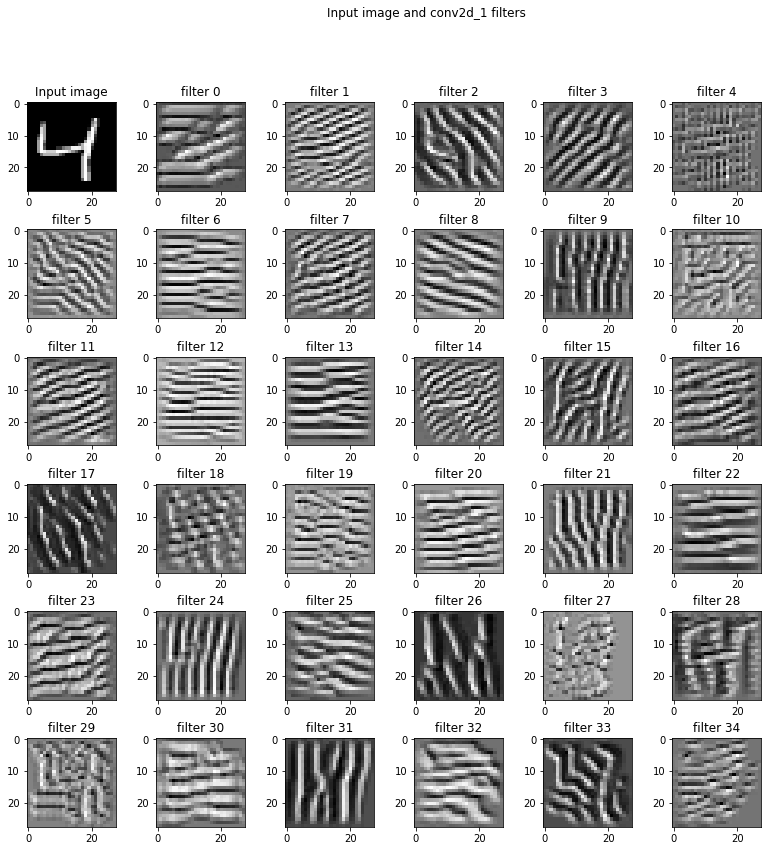

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()